In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

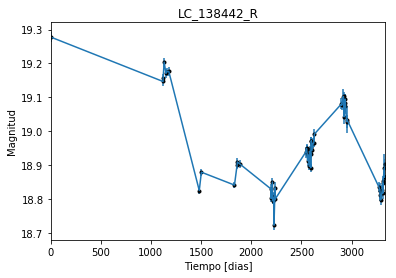

In [2]:
data = np.genfromtxt('LC_138442_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_138442_R')
plt.savefig("LC_138442_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

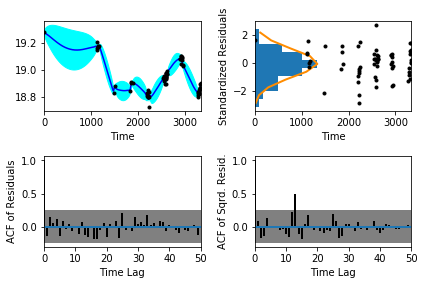

In [5]:
sample.assess_fit()

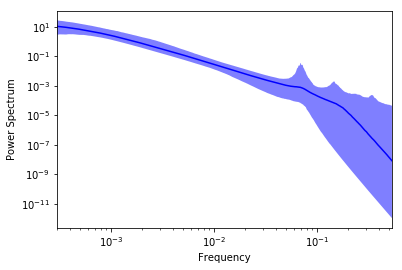

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

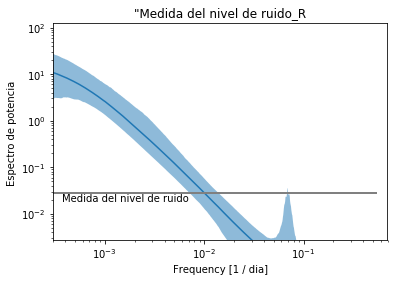

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_138442_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_138442_R')

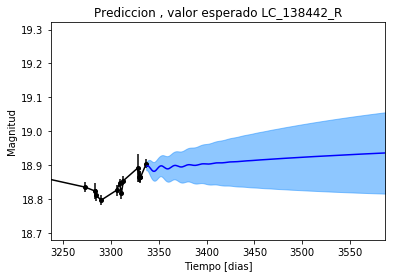

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_138442_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_138442_R')

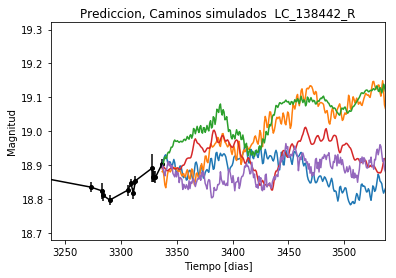

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_138442_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


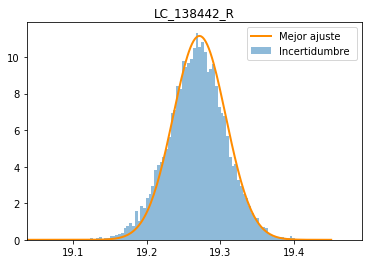

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_138442_R')
plt.savefig("Mejor_ajuste_LC_138442_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_138442_R')

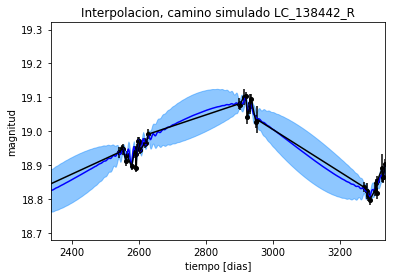

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_R')

Text(0.5,1,'Interpolacion, camino simulado LC_138442_R')

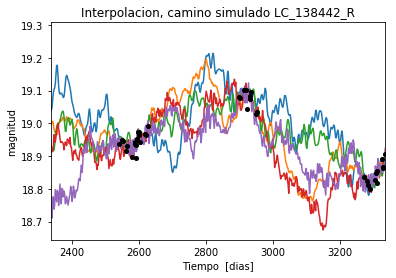

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 243.474629781
Median: 0.010067880866
Standard deviation: 0.151064398143
68% credibility interval: [ 0.00128547  0.08311679]
95% credibility interval: [  4.31082906e-04   5.90374279e-01]
99% credibility interval: [  3.40303599e-04   9.29222806e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 365.907981294
Median: 0.00871017274057
Standard deviation: 0.110034500264
68% credibility interval: [ 0.00108216  0.06941153]
95% credibility interval: [  3.92237582e-04   4.03401897e-01]
99% credibility interval: [  3.20269510e-04   6.93803408e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 524.563233767
Median: 0.116462440346
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 607.55485998
Median: 150.212161079
Standard deviation: 2.29855129533
68% credibility interval: [ 147.81977536  152.15481062]
95% credibility interval: [ 144.61196729  153.61446271]
99% credibility interval: [ 142.18306144  154.44894369]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 152.289965412
Median: 1.13295892839
Standard deviation: 2.68575962154
68% credibility interval: [ 0.11938121  5.11119463]
95% credibility interval: [ 0.04877532  9.38735698]
99% credibility interval: [  0.02825837  12.42991088]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 113.885893798
Median: 1.91005349201
Standard deviation: 14.0984663387
68% credibility interval: [  0.20232604  24.13761729]
95% credibility interval: [  0.16776479 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 466.813599622
Median: 3.11986896185e-75
Standard deviation: 1.64529332131e+106
68% credibility interval: [  8.20454446e-153   5.70222769e-015]
95% credibility interval: [  2.22214574e-300   7.60349620e+001]
99% credibility interval: [  1.11996834e-301   7.55620575e+105]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1104.10284086
Median: 19.012667635
Standard deviation: 0.0763183395838
68% credibility interval: [ 18.94507551  19.09065538]
95% credibility interval: [ 18.87643442  19.17301742]
99% credibility interval: [ 18.81437181  19.25563862]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 91.506659577
Median: 0.145514695942
Standard deviation: 0.298199027755
68% credibility interval: [ 0.06886665  0.67168875]
95% credibility interval: [ 0.          0.97243706]
99% credibility interval: [ 0.          1.04854076]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 91.506659577
Median: 0.145514695942
Standard deviation: 0.298199027755
68% credibility interval: [ 0.06886665  0.67168875]
95% credibility interval: [ 0.          0.97243706]
99% credibility interval: [ 0.          1.04854076]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 310.648791755
Median: 0.0
Standard deviation: 0.000284926689731
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 607.55485998
Median: 150.212161079
Standard deviation: 2.29855129533
68% credibility interval: [ 147.81977536  152.15481062]
95% credibility interval: [ 144.61196729  153.61446271]
99% credibility interval: [ 142.18306144  154.44894369]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 517.656294328
Median: 0.0224748912666
Standard deviation: 0.0128129829111
68% credibility interval: [ 0.01555092  0.03356055]
95% credibility interval: [ 0.01101023  0.05178753]
99% credibility interval: [ 0.00911782  0.08734398]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 635.606575386
Median: 1.05205419057
Standard deviation: 0.228067678539
68% credibility interval: [ 0.85869734  1.29575875]
95% credibility interval: [ 0.72231857  1.63318785]
99% credibility interval: [ 0.64909271  1.8384825 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 172.678486579
Median: 0.00993675186838
Standard deviation: 0.466189285457
68% credibility interval: [  2.25048829e-04   3.88845955e-01]
95% credibility interval: [  1.55814992e-05   1.73033606e+00]
99% credibility interval: [  3.09704614e-107   2.53149856e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 243.474629781
Median: (-0.0632583611314-5.69786620329j)
Standard deviation: 2.10034312942
68% credibility interval: [-0.52223821-1.05468809j -0.00807684-0.15402339j]
95% credibility interval: [ -3.70943100e+00-3.44853449j  -2.70857378e-03-0.41541243j]
99% credibility interval: [ -5.83847908e+00+0.j          -2.13819057e-03-0.43170691j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 365.907981294
Median: (-0.0547276293866+2.55474370059j)
Standard deviation: 1.99712654971
68% credibility interval: [-0.43612551+3.25868593j -0.00679942+4.66150748j]
95% credibility interval: [ -2.53464887e+00+2.9687723j   -2.46450141e-03+0.46505855j]
99% credibility interval: [ -4.35929538e+00+2.91828778j  -2.01231268e-03+0.4108084j ]
Post